In [22]:
import pandas as pd
import matplotlib.pyplot as plt
pumkins = pd.read_csv('../data/US-pumpkins.csv')
pumkins = pumkins[pumkins["Package"].str.contains('bushel', case=True, regex=True)]
pumkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [23]:
pumkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [24]:
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumkins = pumkins.loc[:, columns_to_select]

In [25]:
price = (pumkins['Low Price'] + pumkins['High Price']) / 2
month = pd.DatetimeIndex(pumkins['Date']).month

In [26]:
new_pumkins = pd.DataFrame({'Month': month, 'Package': pumkins['Package'], 'Low Price': pumkins['Low Price'], 'High Price': pumkins['High Price'], 'Price': price})
new_pumkins.loc[new_pumkins["Package"].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumkins.loc[new_pumkins["Package"].str.contains('1/2'), 'Price'] = price/(1/2)

Text(0, 0.5, 'Pumkins Price')

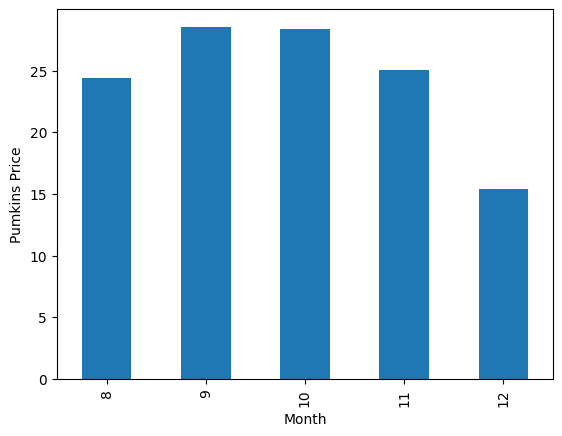

In [29]:
new_pumkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumkins Price")